In [1]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 1.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm


In [3]:
base_dir = "https://github.com/natsunoyuki/Data_Science/blob/master/gold/gold/gold_price_usd.csv?raw=True"

In [5]:
data = pd.read_csv(base_dir)
data

,datetime,gold_price_usd
0,1978-12-29,137.06
1,1979-01-01,137.06
2,1979-01-02,137.29
3,1979-01-03,134.01
4,1979-01-04,136.79
...,...,...
11146,2021-09-20,1499.15
11147,2021-09-21,1513.45
11148,2021-09-22,1511.40
11149,2021-09-23,1489.43


In [6]:
# Convert the datetime from str to datetime object.
data["datetime"] = pd.to_datetime(data["datetime"])

In [7]:
# Determine the daily change in gold price.
data["gold_price_change"] = data["gold_price_usd"].diff()


In [8]:
data["gold_price_change"]

0          NaN
1         0.00
2         0.23
3        -3.28
4         2.78
         ...  
11146     3.07
11147    14.30
11148    -2.05
11149   -21.97
11150     1.84
Name: gold_price_change, Length: 11151, dtype: float64

In [9]:
# Restrict the data to later than 2008 Jan 01.
data = data[data["datetime"] >= pd.to_datetime("2008-01-01")]


In [10]:
data

,datetime,gold_price_usd,gold_price_change
7567,2008-01-01,570.26,0.00
7568,2008-01-02,575.02,4.76
7569,2008-01-03,583.36,8.34
7570,2008-01-04,578.70,-4.66
7571,2008-01-07,583.83,5.13
...,...,...,...
11146,2021-09-20,1499.15,3.07
11147,2021-09-21,1513.45,14.30
11148,2021-09-22,1511.40,-2.05
11149,2021-09-23,1489.43,-21.97


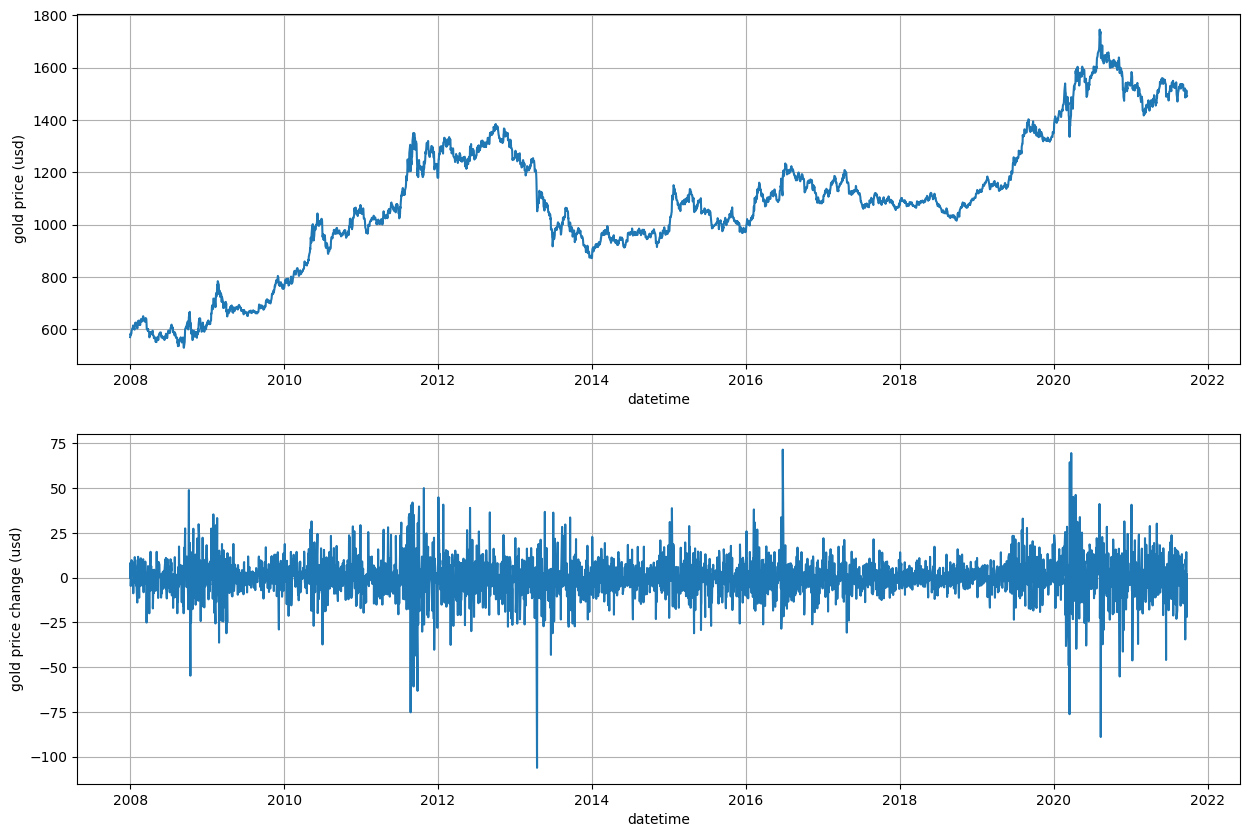

In [11]:
# Plot the daily gold prices as well as the daily change.
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(data["datetime"], data["gold_price_usd"])
plt.xlabel("datetime")
plt.ylabel("gold price (usd)")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(data["datetime"], data["gold_price_change"])
plt.xlabel("datetime")
plt.ylabel("gold price change (usd)")
plt.grid(True)
plt.show()

**3 hidden states is that we expect at the very least 3 different regimes in the daily changes — low, medium and high votality.**

HMM:

- Observations X
- 3 Hidden states : [low, medium, high]
- Initial Hidden State Probabilities (pi)
- Hidden State Transition Matrix (A)
- Observable Emittion states (B)

HMM Model = (pi,A,B)

In [13]:
# Use the daily change in gold price as the observed measurements X.
X = data[["gold_price_change"]].values
X

array([[  0.  ],
       [  4.76],
       [  8.34],
       ...,
       [ -2.05],
       [-21.97],
       [  1.84]])

In [41]:
# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)

GaussianHMM(covariance_type='tied', n_components=3, n_iter=50, random_state=42)

In [42]:
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

In [43]:
print("Unique states:")
print(states)

Unique states:
[1 0 2]


It is written on the reference that " We find that for this particular data set, the model will almost always start in state 0."

But my case not

**Initial Hidden State Probabilities (pi)**

In [44]:
print("\nStart probabilities:")
print(model.startprob_)



Start probabilities:
[1.04416799e-02 9.89558320e-01 5.06263279e-47]


**Hidden State Transition Matrix (A)**

In [45]:
print("\nTransition matrix:")
print(model.transmat_)


Transition matrix:
[[1.30303357e-03 9.98654552e-01 4.24141410e-05]
 [9.46909274e-01 2.67035183e-02 2.63872076e-02]
 [2.00217476e-01 6.52168535e-01 1.47613989e-01]]


**Observable Emittion states (B)**

In [46]:
print("\nGaussian distribution means:")
print(model.means_)



Gaussian distribution means:
[[-0.12185412]
 [-0.41758969]
 [33.6815317 ]]


In [47]:
print("\nGaussian distribution covariances:")
print(model.covars_)


Gaussian distribution covariances:
[[[104.39954687]]

 [[104.39954687]]

 [[104.39954687]]]


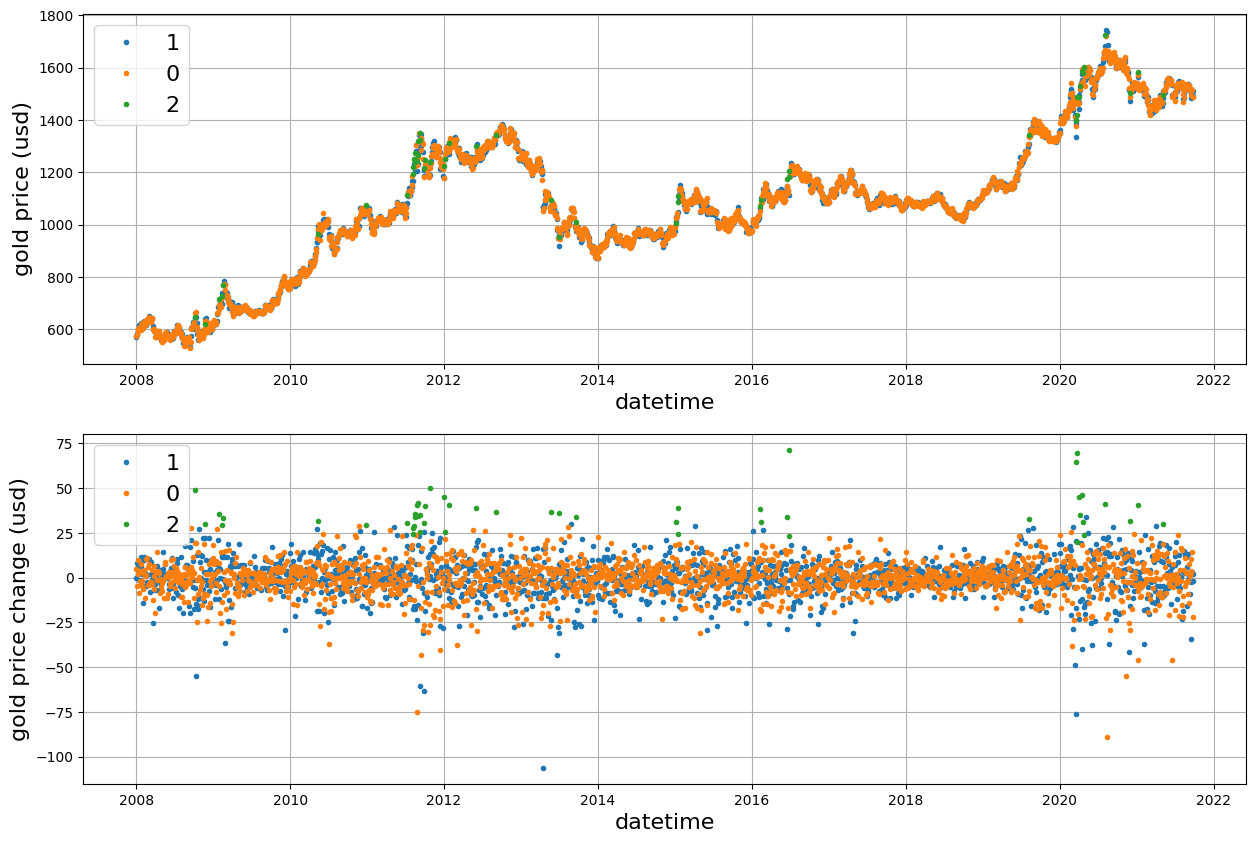

In [48]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = data["datetime"].iloc[want]
    y = data["gold_price_usd"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price (usd)", fontsize=16)
plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = data["datetime"].iloc[want]
    y = data["gold_price_change"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price change (usd)", fontsize=16)
plt.show()
